In [35]:
# Import necessary libraries
import pandas as pd                   # For data manipulation
from sklearn.linear_model import LinearRegression  # To build the regression model
from sklearn.preprocessing import StandardScaler   # To normalize features (optional but recommended)


In [36]:
# Load train and test datasets
train_data = pd.read_csv('train.csv')  # Path to your train.csv file
test_data = pd.read_csv('test.csv')    # Path to your test.csv file

# Inspect the first few rows of the data to understand its structure
print(train_data.head())  # Prints the first 5 rows of the training data
print(test_data.head())   # Prints the first 5 rows of the test data

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  
   ID     crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0   3  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
1   6  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
2   8  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
3   9  0.21124  12.5   7.87     0  0.524 

In [38]:
# Assume 'prices' is the column name for the target variable (house prices)
X_train = train_data.drop(columns=['medv'])  # Features (input variables) for training
y_train = train_data['medv']                 # Target variable (prices)

# For test data, we don't have 'prices', so we just use all the columns as features
X_test = test_data  # Features for which we need to predict prices


In [39]:
# Initialize the StandardScaler for normalizing the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)


In [40]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [41]:
# Predict house prices using the test data
y_pred = model.predict(X_test_scaled)

# Check the first few predictions
print(y_pred[:5])  # Print the first 5 predicted house prices


[31.27947429 25.64467092 18.66939919  9.70469293 18.18776827]


In [42]:
# Save the predictions to a CSV file
output = pd.DataFrame({'Predicted Price': y_pred})
output.to_csv('predicted_prices.csv', index=False)

print("Predictions saved to predicted_prices.csv")


Predictions saved to predicted_prices.csv


In [45]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Train the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)


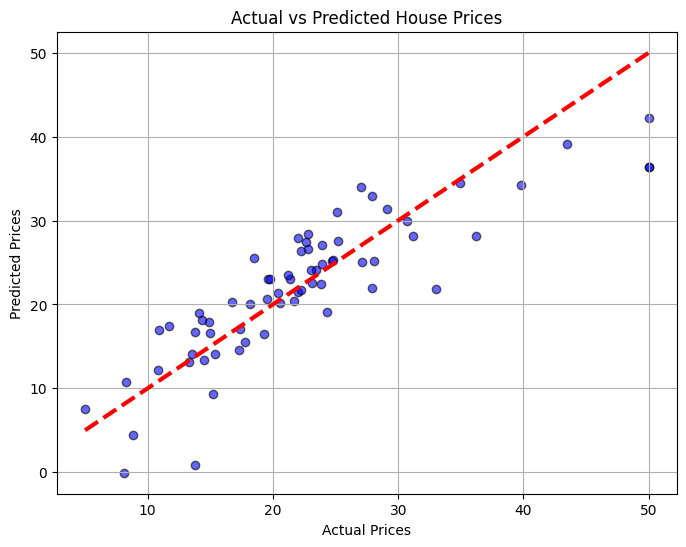

In [46]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, color='blue', edgecolors='k', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=3)  # Perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
